<a href="https://colab.research.google.com/github/peterbb148/Python/blob/master/Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib as mp
import requests
import json
import csv
from io import StringIO


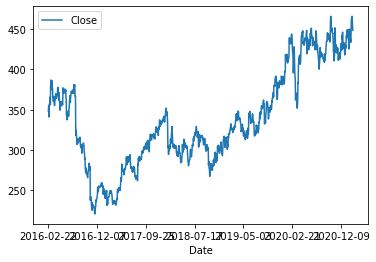

In [2]:
#df = pd.read_csv('AAB.csv', sep=';', decimal=',')
#df_t = df.T
#print(df_t)
url = 'https://query1.finance.yahoo.com/v7/finance/download/{}'
stock = "NOVO-B.CO"
params = {
    'range' : '5y',
    'interval' : '1d',
    'events' : 'history'
}
response = requests.get(url.format(stock), params=params)
file = StringIO(response.text)
df = pd.read_csv(file, sep=',', decimal='.')
# df
df.plot(x ='Date', y='Close', kind = 'line')